# Diabetes Dataset Exploration & Model Training

In this notebook we will:
- Explore the **Diabetes dataset** from scikit-learn.
- Perform EDA (exploratory data analysis).
- Train and compare multiple regression models.
- (Optional) Track experiments using **MLflow**.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import joblib

# (Optional) MLflow
import mlflow


#### Load Dataset

In [4]:
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

print("Shape:", df.shape)
df.head()


Shape: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
# Dataset Info

df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


* Correlation HeatMap

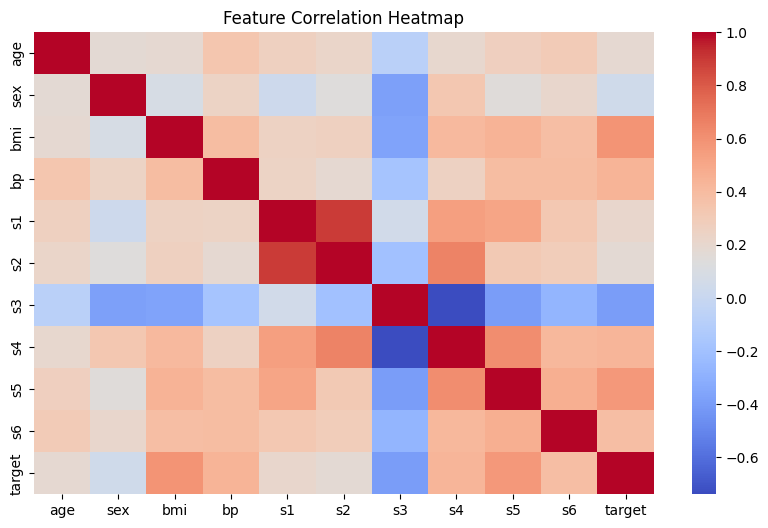

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

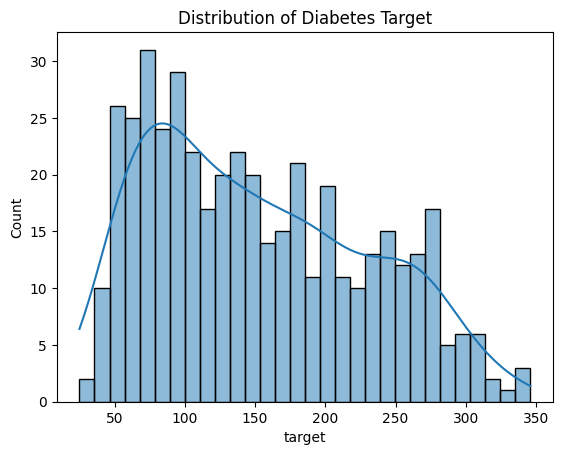

In [7]:
# Target Distribution

sns.histplot(df['target'], bins=30, kde=True)
plt.title("Distribution of Diabetes Target")
plt.show()

In [8]:
# Train/Test Split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)



Train shape: (353, 10) Test shape: (89, 10)


In [9]:
# Baseline Model: Linear Regression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Linear Regression -> R²: {r2:.4f}, MSE: {mse:.2f}")


Linear Regression -> R²: 0.4526, MSE: 2900.19


In [10]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression -> R²: {r2_ridge:.4f}, MSE: {mse_ridge:.2f}")


Ridge Regression -> R²: 0.4192, MSE: 3077.42


In [11]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest -> R²: {r2_rf:.4f}, MSE: {mse_rf:.2f}")


Random Forest -> R²: 0.4428, MSE: 2952.01


In [12]:
results = pd.DataFrame({
    "Model": ["LinearRegression", "Ridge", "RandomForest"],
    "R2 Score": [r2, r2_ridge, r2_rf],
    "MSE": [mse, mse_ridge, mse_rf]
})

results

,Model,R2 Score,MSE
0,LinearRegression,0.452603,2900.193628
1,Ridge,0.419153,3077.415939
2,RandomForest,0.442823,2952.010589


In [13]:
best_model = linreg  # Random Forest usually performs best
joblib.dump(best_model, "../models/diabetes_model.pkl")
print("Best model saved to ../models/diabetes_model.pkl")


Best model saved to ../models/diabetes_model.pkl


In [14]:

mlflow.set_experiment("diabetes_experiments")

with mlflow.start_run(run_name="RandomForest"):
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("r2_score", r2_rf)
    mlflow.log_metric("mse", mse_rf)
    mlflow.sklearn.log_model(rf, "model")

print("Experiment logged with MLflow")


2025/09/07 00:23:33 INFO mlflow.tracking.fluent: Experiment with name 'diabetes_experiments' does not exist. Creating a new experiment.
2025/09/07 00:23:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/07 00:23:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Experiment logged with MLflow
